# NumPy

[NumPy](https://numpy.org/doc/stable/) is a package for numerical computations

* supports vectors, matrices and multidimensional arrays
* fast numerical processing by means of vectorized functions
* based on object type [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

## `numpy` vs `list`

* NumPy array has fixed length, while lists can grow dynamically
* All the elements of a NumPy array must have the same type
* Math operations with NumPy arrays are allowed (just like with vectors)

**Motivating example**

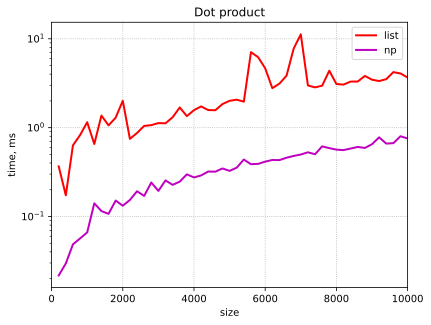

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

%config InlineBackend.figure_format = 'svg'

def inner_list(a, b: list):
    return sum([left*right for left, right in zip(a, b)])

def inner_np(a, b: np.array):
    return a.dot(b)

def measure_time(func, n, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(n), np.random.randn(n))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=10, max_size=200, n_samples=20):
    times = []
    sizes = np.arange(step, max_size + 1, step)
    for size in sizes:
        times.append(measure_time(func, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=100, max_size=1000, n_samples=20):
    loop_times = 1000*get_times_lists(inner_list, step, max_size, n_samples)
    np_times = 1000*get_times_lists(inner_np, step, max_size, n_samples)
    sizes = np.arange(step, max_size + 1, step)
    plt.semilogy(sizes, loop_times, c='r', lw=2, label="list")
    plt.semilogy(sizes, np_times, c='m', lw=2, label="np")
    plt.xlim(0, max_size)
    plt.title("Dot product")
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("time, ms")
    plt.grid(ls=":");

plot_time_vs_size(200, 10**4)

## NumPy arrays creation

* Converting Python structures
* Generation via built-in functions

### Converting from Python structures

In [30]:
lst = [1, 2, 3, 4, 5]
arr = np.array(lst)
print(f"list = {lst}, np.array = {arr}")
print(type(lst), type(arr))

list = [1, 2, 3, 4, 5], np.array = [1 2 3 4 5]
<class 'list'> <class 'numpy.ndarray'>


In [31]:
tpl = (1, 2, 3, 4, 5)
arr = np.array(tpl)
print(f"tuple = {tpl}, np.array = {arr}")
print(type(tpl), type(arr))

tuple = (1, 2, 3, 4, 5), np.array = [1 2 3 4 5]
<class 'tuple'> <class 'numpy.ndarray'>


The underlying data type can be specified by the argument [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [32]:
arr.dtype

dtype('int64')

In [33]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

### Numpy arrays generation

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — like `range`
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — uniform partition of a segment
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — log scale partition
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — creates an array of zeroes
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — creates an array of ones
* [full](https://numpy.org/doc/stable/reference/generated/numpy.full.html) — creates an array of the same values

In [34]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [38]:
np.linspace(0, 5, 11, endpoint=False)

array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
       2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
       4.54545455])

In [40]:
np.logspace(0, 9, 11, base=2)

array([  1.        ,   1.86606598,   3.48220225,   6.49801917,
        12.12573253,  22.627417  ,  42.22425314,  78.79324245,
       147.03338944, 274.37400641, 512.        ])

In [42]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [43]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [44]:
np.full((2, 2), 42)

array([[42, 42],
       [42, 42]])

In [45]:
# creates a diagonal matrix
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [46]:
# creates an identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [47]:
array = np.ones((2, 3))
print('Array shape = {}, number of dimensions = {}'.format(array.shape, array.ndim))

Array shape = (2, 3), number of dimensions = 2


In [48]:
array

array([[1., 1., 1.],
       [1., 1., 1.]])

Method [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) allows to broadcast an array without changing its data.

In [50]:
a = np.arange(0, 6)
print(a, a.shape)

[0 1 2 3 4 5] (6,)


In [51]:
array = a.reshape((2, 3))
print(array, array.shape)

[[0 1 2]
 [3 4 5]] (2, 3)


Use [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html?highlight=ravel#numpy.ravel) to flatten a multidimensional array into a vector 

In [55]:
# can use -1 instead of one dimension
array = np.arange(0, 6, 0.5).reshape((3, -1))
print(array, array.shape)
array = np.ravel(array)
print(array, array.shape)

[[0.  0.5 1.  1.5]
 [2.  2.5 3.  3.5]
 [4.  4.5 5.  5.5]] (3, 4)
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5] (12,)


## Indexing

In [56]:
print(array[0])
print(array[-1])  
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0.0
5.5
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.5 1.5 2.5 3.5 4.5]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


Can use arrays of ints or booleans as indices

In [57]:
array[[0, 2, 4, 6, 8, 10]]

array([0., 1., 2., 3., 4., 5.])

In [58]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

array([0., 1., 2., 3., 4., 5.])

Boolean indexing is commonly used for filtering

In [59]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
x[(x % 2 == 0) & (x > 5)]

array([6, 8])

`x` was not actually changed but altering via boolean indexing is possible

In [61]:
print(x)
x[x > 3] *= 2
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  8 10 12 14 16 18]


### Random

In [85]:
np.random.seed(101)
a = np.random.rand(5)
b = np.random.rand(5)
print(a)
print(b)

[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]
[0.83389686 0.30696622 0.89361308 0.72154386 0.18993895]


### Arithmetics with arrays as vectors

In [86]:
a + b 

array([1.35029549, 0.87763381, 0.92208731, 0.89306552, 0.87521594])

In [80]:
a - b

array([-0.31749823,  0.26370137, -0.86513885, -0.55002221,  0.49533803])

In [81]:
a * b

array([0.4306232 , 0.17517567, 0.02544494, 0.1237604 , 0.13016079])

In [82]:
a / b

array([0.61925959, 1.85905663, 0.03186416, 0.2377148 , 3.60788015])

Inner product: $(a, b) = \sum\limits_{k=1}^n a_k b_k$

In [87]:
a.dot(b)

0.8851650000094948

In [88]:
a @ b

0.8851650000094948

In [89]:
np.dot(a, b)

0.8851650000094948

### `sum`, `mean`, `std`

In [90]:
np.sum(a), a.sum()

(1.9723390789710982, 1.9723390789710982)

In [91]:
np.mean(b), b.mean()

(0.5891917955929626, 0.5891917955929626)

In [92]:
np.std(a), np.std(b)

(0.2506550421114526, 0.2860503677763882)

In [93]:
lst = list(range(2*10**6))
arr = np.arange(2*10**6)
print(sum(lst), arr.sum())

1999999000000 1999999000000


In [94]:
%%timeit
sum(lst)

16.1 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [95]:
%%timeit
np.sum(arr)

1.53 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Matrix operations

In [96]:
A = np.random.normal(size=(2, 2))
A

array([[-2.01816824,  0.74012206],
       [ 0.52881349, -0.58900053]])

In [97]:
# transpose
A.T

array([[-2.01816824,  0.52881349],
       [ 0.74012206, -0.58900053]])

In [98]:
np.transpose(A)

array([[-2.01816824,  0.52881349],
       [ 0.74012206, -0.58900053]])

In [99]:
# calc determinant
np.linalg.det(A)

0.7973156409556252

In [101]:
# inverse matrix
B = np.linalg.inv(A)
A @ B

array([[ 1.00000000e+00, -4.51542844e-17],
       [-1.01303503e-16,  1.00000000e+00]])

In [102]:
np.sum(A)

-1.3382332261785077

In [104]:
# sum of elements in every column
np.sum(A, axis=0)

array([-1.48935475,  0.15112152])

In [105]:
# sum of elements in every row
np.sum(A, axis=1)

array([-1.27804619, -0.06018704])

### Matrix indexing

In [106]:
A = np.arange(15).reshape((3, 5))
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [112]:
B = np.random.normal(loc=5, scale=10, size=(3, 4))
B

array([[ 3.65159279,  8.90527843,  6.66904636,  6.84501859],
       [13.07705914,  5.72959675, 11.38787013,  8.29646299],
       [ 0.02895977, -2.54069701, -4.43406403,  9.84751647]])

In [115]:
np.sort(B, axis=None)

array([-4.43406403, -2.54069701,  0.02895977,  3.65159279,  5.72959675,
        6.66904636,  6.84501859,  8.29646299,  8.90527843,  9.84751647,
       11.38787013, 13.07705914])

In [10]:
# access to element
A[1, 2]

7

In [11]:
# second row
A[1, :]

array([5, 6, 7, 8, 9])

In [12]:
# third column
A[:, 2]

array([ 2,  7, 12])

In [107]:
# slice
A[0, 1:4]

array([1, 2, 3])

In [108]:
# every second element of the last row
A[-1, ::2]

array([10, 12, 14])

In [109]:
# average over the whole matrix
np.mean(A)

7.0

In [116]:
# average over each column
np.mean(A, axis=0)

array([5., 6., 7., 8., 9.])

In [117]:
# average over each row
np.mean(A, axis=1)

array([ 2.,  7., 12.])

In [118]:
B = np.arange(20, 30).reshape((5, 2))
B

array([[20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29]])

In [119]:
# matrix product
A.dot(B)

array([[ 260,  270],
       [ 860,  895],
       [1460, 1520]])

In [120]:
A @ B

array([[ 260,  270],
       [ 860,  895],
       [1460, 1520]])

### Concatenation

**np.concatenate, np.hstack, np.vstack, np.dstack**

In [121]:
x = np.arange(6).reshape(3, 2)
y = np.arange(100, 112).reshape(3, 4)

In [122]:
x, y

(array([[0, 1],
        [2, 3],
        [4, 5]]),
 array([[100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]))

In [123]:
np.hstack((x, y))

array([[  0,   1, 100, 101, 102, 103],
       [  2,   3, 104, 105, 106, 107],
       [  4,   5, 108, 109, 110, 111]])

In [126]:
np.vstack((x.T, y.T))

array([[  0,   2,   4],
       [  1,   3,   5],
       [100, 104, 108],
       [101, 105, 109],
       [102, 106, 110],
       [103, 107, 111]])

In [129]:
np.concatenate((x, y), axis=1)

array([[  0,   1, 100, 101, 102, 103],
       [  2,   3, 104, 105, 106, 107],
       [  4,   5, 108, 109, 110, 111]])

In [130]:
np.concatenate((x.T, y.T), axis=0)

array([[  0,   2,   4],
       [  1,   3,   5],
       [100, 104, 108],
       [101, 105, 109],
       [102, 106, 110],
       [103, 107, 111]])

## [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но всё-таки созгласованных размерностей. Простейшим примером является умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [3]:
2*np.arange(1, 4)

array([2, 4, 6])

```{admonition} Broadcasting rule
:class: important
In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one
```

Если количество размерностей не совпадают, то к массиву меньшей размерности добавляются фиктивные размерности "слева", например:


In [4]:
a  = np.ones((2,3,4))
b = np.ones(4)
c = a * b # here a.shape=(2,3,4) and b.shape is considered to be (1,1,4)

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [5]:
np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]) + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Проделать тот же трюк со столбцами не получится:

![Imgurl](https://i.imgur.com/9LvGoeL.gif)

In [11]:
A = np.repeat(np.arange(0, 31, 10), 3).reshape(4, 3)
A

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [12]:
A + np.arange(4)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

A possible solution is to use double transposing:

In [13]:
(A.T + np.arange(4)).T

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])